interactive(children=(FloatSlider(value=0.05, description='x0', max=0.05, min=-0.05, step=0.01), FloatSlider(v…

<IPython.core.display.Javascript object>


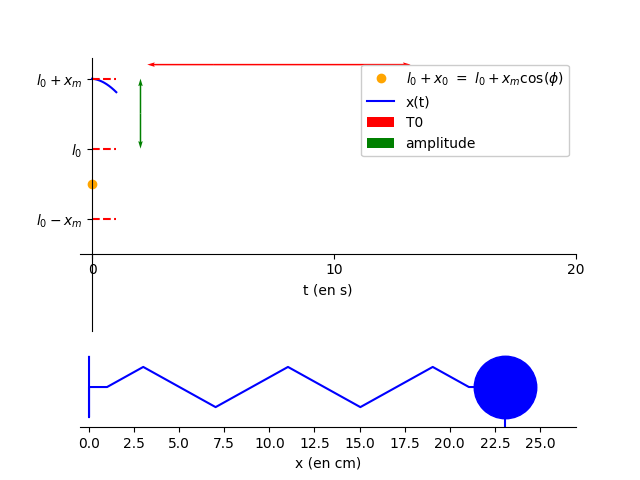

In [1]:
%matplotlib notebook
#En dynamique
from math import cos,pi,sin
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from ipywidgets import interact, widgets
import matplotlib.gridspec as gridspec


@interact(x0=(-0.05,0.05,0.01),v0=(-0.05,0.05,0.01),l0=(0,0.15,0.01),k=(0.5,1.5,0.01),m=(0.5,1.5,0.01))
def setx0(x0=0.05,v0=0.,l0=0.,k=1.,m=0.5):
    global t,t2,x,v,A,B,omega,xm,Ep,Em,Ec,ki,mi,li,vi
    
    t=[0]
    t2=[0]
    x=[l0+x0]
    ki = k
    mi = m
    li = l0
    vi = v0
    omega = (k/m)**0.5
    xm = (x0**2 + v0**2/omega**2)**0.5
    A = x0
    B = v0/omega


fig = plt.figure()
gs = gridspec.GridSpec(4, 1)

ax1 = fig.add_subplot(gs[0:-1,:])
ax2 = fig.add_subplot(gs[-1,:])
fig.show()

dt = 100

def f(t):
    global A,B,omega,li
    return li+A*cos(omega*t)+B*sin(omega*t)

def anime(i):
    global t,x,v,t2,ki,mi,Ec,Ep,Em,li,xm,vi
    t.append(t[-1]+dt/1000)
    t2.append(t2[-1]+dt/1000)
    x.append(f(t[-1]))
    ax1.clear()
    ax2.clear()
   
    
      
    ax1.spines['right'].set_color('none')
    ax1.spines['top'].set_color('none')
    ax1.spines['bottom'].set_position(('data',0))
    ax1.spines['left'].set_position(('data',0))
    ax1.xaxis.set_ticks_position('bottom')
    ax1.yaxis.set_ticks_position('left')
    ax1.set_xlabel("t (en s)")
    ax1.set_xlim([-0.5,20])
    ax1.set_ylim([-0.11,0.28])#[min(-0.025,li-1.05*xm),li+1.05*xm])
    ax1.set_xticks([0,10,20])
    if xm==0:
        if li!=0:
            ax1.set_yticks([li])
            ax1.set_yticklabels(["$l_0$"])
        else:
            ax1.set_yticks([li])
            ax1.set_yticklabels(["0"])   
    elif vi!=0:
        
        if li!=0:
            ax1.set_yticks([li-xm,li,li+xm])
            ax1.set_yticklabels(["$l_0-x_m$","$l_0$","$l_0+x_m$"])
            ax1.plot([0],[li+A],"o",color="orange",label="$l_0+x_0\ =\ l_0+x_m\cos(\phi)$")
        else:
            ax1.set_yticks([-xm,li,xm])
            ax1.set_yticklabels(["$-x_m$","0","$x_m$"])    
            ax1.plot([0],[li+A],"o",color="orange",label="$x_0\ =\ x_m\cos(\phi)$")
    else:
        if li!=0:
            ax1.set_yticks([li-xm,li,li+xm])
            ax1.set_yticklabels(["$l_0-x_0$","$l_0$","$l_0+x_0$"])
        else:
            ax1.set_yticks([-xm,li,xm])
            ax1.set_yticklabels(["$-x_0$","0","$x_0$"])    
    ax1.plot(t2,x,"blue",label="x(t)")
    ax1.plot(t2,[li+xm]*len(t2),"--",color="red")
    ax1.plot(t2,[li-xm]*len(t2),"--",color="red")
    ax1.plot(t2,[li]*len(t2),"--",color="red")
    ax1.quiver([5.,5.],[li+xm+0.02,li+xm+0.02],[-0.25*2*pi/omega,.75*2*pi/omega],[0.0,0.0],width=1.5,units='dots',angles="xy",scale_units='xy',scale=1.0,label="T0",color="red")
    ax1.quiver([2.,2.],[li+xm/2,li+xm/2],[0.0,0.0],[xm/2,-xm/2],width=1.5,units='dots',angles="xy",scale_units='xy',scale=1.0,label="amplitude",color="green")
    
    ax1.legend(framealpha=1.)
  
    
  
    ax2.set_xlim([-0.155+li,li+0.12])
    ax2.set_ylim([-0.02,0.02])
    temp = []
    temp2 = []
    for i in range(16):
        if -0.151+li<-0.125+i*0.025<0.11+li:
            temp.append(-0.125+i*0.025)
            temp2.append("{:.1f}".format(temp[-1]*100))
    ax2.set_xticks(temp)
    ax2.set_xticklabels(temp2)
    ax2.set_yticks([])
    ax2.set_xlabel("x (en cm)")
    ax2.spines['right'].set_color('none')
    ax2.spines['top'].set_color('none')
    ax2.spines['left'].set_color('none')
    ax2.xaxis.set_ticks_position('bottom')
  

    ax2.plot([x[-1]],[0],"o",color="blue",markersize=45)
    ax2.plot([x[-1],x[-1]],[0,-0.03],"blue")
    
    
    
    dx=0.12+x[-1]-li
    dx = dx/10
    ax2.plot([-0.15+li,-0.15+li,-0.15+li,-0.14+li,-0.14+dx+li]+[-0.14+dx+i*2*dx+li for i in range(1,5)]+[-0.14+10*dx+li,x[-1]],[0.015,-0.015,0,0,0.01]+[(-1)**i*0.01 for i in range(1,5)]+[0,0],"blue")
   
    if t2[-1]>=20:
        t=[t[-1]]
        t2=[0]
        x=[x[-1]]
    
    
    
simulation=animation.FuncAnimation(fig,anime,interval=dt)